# 1- Import libraries and load data

In [ ]:
import pandas as pd
import numpy as np
import re
import pickle

import warnings
warnings.simplefilter("ignore")

In [ ]:
# load the data
data = pd.read_csv("sample_data/language_detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
# value count for each language
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

# 2- Preprocessing

In [ ]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [ ]:
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([3, 3, 3, ..., 9, 9, 9])

In [ ]:
# clases reference
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [ ]:
le.inverse_transform(y)

array(['English', 'English', 'English', ..., 'Kannada', 'Kannada',
       'Kannada'], dtype=object)

In [ ]:
# filtering and preprocessing the training data
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)
X = pd.Series(data_list)

In [ ]:
# creating test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
# Convert text to a matrix of token counts using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)

X_train = cv.transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [ ]:
X_train.shape

(8269, 34339)

In [ ]:
X.shape

(10337,)

# 3- Model training

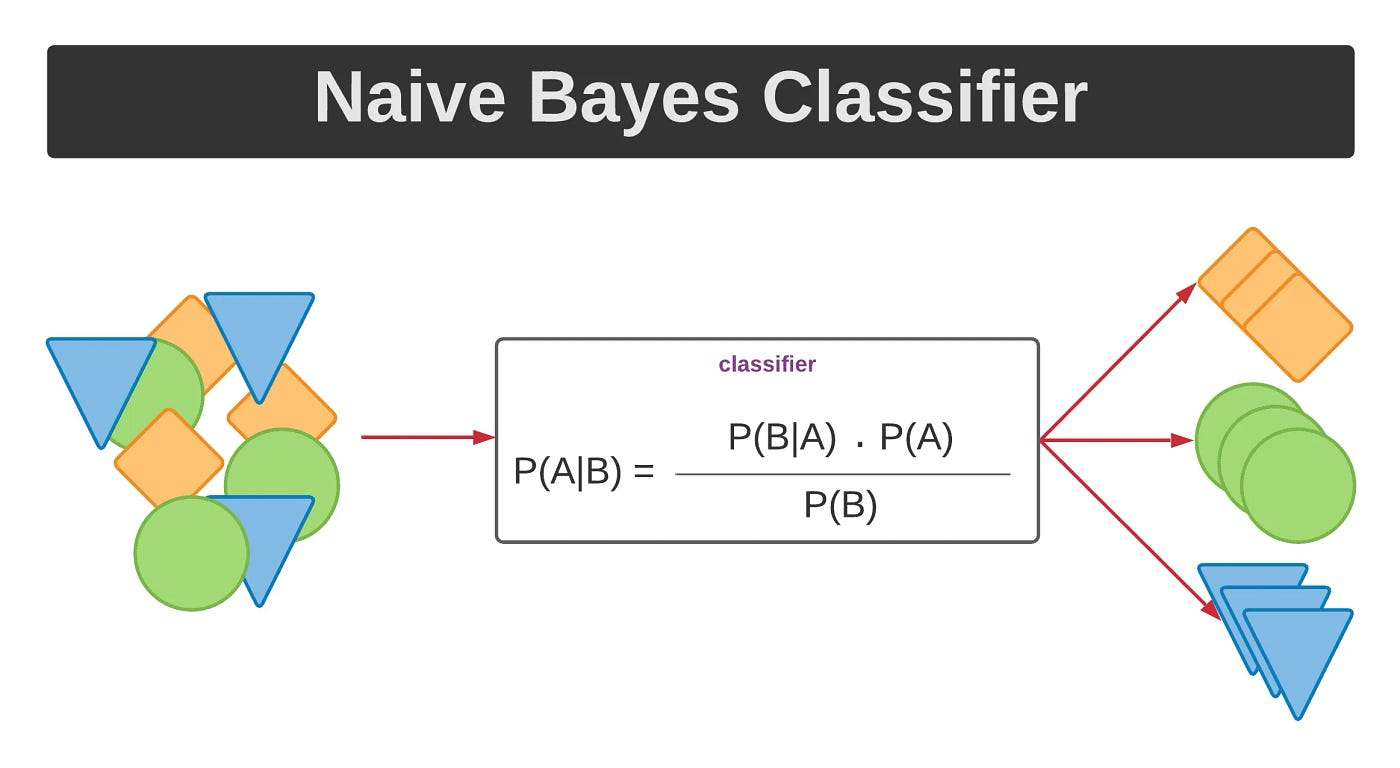

In [ ]:
# model training
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# model prediction
y_pred = model.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
print("Accuracy is :",ac)

Accuracy is : 0.9821083172147002


## 3.1 Embedding similar clases (same baseline)

In [ ]:
# creating the final model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vectorizer', cv), ('multinomialNB', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [ ]:
# check for the same accuracy
y_pred = pipe.predict(X_test)

ac = accuracy_score(y_test, y_pred)
print("Accuracy is :",ac)

Accuracy is : 0.9821083172147002


In [ ]:
y_pred

array([12,  8,  3, ...,  2,  6,  4])

### 3.1.1 Final training (all available data)

In [ ]:
# Use all the the data for the final training
pipe.fit(X, y)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

## 3.2 Persisting the model & decoder

In [ ]:
with open('models/trained_model-1.0.0.pkl','wb') as f:
  pickle.dump(pipe, f)

with open('models/language_dec-1.0.0.pkl','wb') as f:
  pickle.dump(le.classes_, f)

In [ ]:
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

# 4 Defining final pipeline

In [ ]:
with open('models/trained_model-1.0.0.pkl', 'rb') as f:
  model = pickle.load(f)

with open('models/language_dec-1.0.0.pkl', 'rb') as f:
  decoder = pickle.load(f)

def predict_pipeline(text):
  text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
  text = re.sub(r'[[]]', ' ', text)
  text = text.lower()
  pred = model.predict([text])
  return decoder[pred[0]]

In [ ]:
text_1 = 'Hello my friend'
text_2 = 'Hola mi amigo'
text_3 = 'Hallo mein Freund'
text_4 = 'Bonjour mon ami'

predict_pipeline(text_4)

'French'